In [42]:
#importar as libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

colors = ["#fdbf5c", "#d43a00", "#1d2440", "#f69a0b", "#9b0800", "#4b2409", "#df621c"]
# sns.set_style("whitegrid")
sns.set_theme(style="ticks")
sns.set_palette(sns.color_palette(colors))

## 1. Leitura inicial dos dados

In [2]:
#importando o conjunto de dados
df = pd.read_csv('../data/raw/wines_SPA.csv')
df.head()

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity
0,Teso La Monja,Tinto,2013,4.9,58,Espana,Toro,995.00,Toro Red,5.0,3.0
1,Artadi,Vina El Pison,2018,4.9,31,Espana,Vino de Espana,313.50,Tempranillo,4.0,2.0
2,Vega Sicilia,Unico,2009,4.8,1793,Espana,Ribera del Duero,324.95,Ribera Del Duero Red,5.0,3.0
3,Vega Sicilia,Unico,1999,4.8,1705,Espana,Ribera del Duero,692.96,Ribera Del Duero Red,5.0,3.0
4,Vega Sicilia,Unico,1996,4.8,1309,Espana,Ribera del Duero,778.06,Ribera Del Duero Red,5.0,3.0


## 2. Descrição do conjunto de dados

![ilustracao vinho](../images/ilustracao.jpeg)

O conjunto de dados **Spanish Wine Quality Data** está relacionado a variantes de vinhos tintos espanhóis. Esses dados  descrevem várias métricas de popularidade, especificações dos vinhos e além da qualidade dos vinhos. 

### 2.1 Dicionário de Dados

In [3]:
dicionario = pd.read_csv("../data/external/dictionary.csv")
dicionario

,variavel,descricao,tipo,subtipo
0,winery,Nome da vinícula,Qualitativa,Nominal
1,wine,Nome do vinho,Qualitativa,Nominal
2,year,Ano da safra do vinho,Quantitativa,Contínua
3,rating,Avaliação do vinho (1-5),Quantitativa,Discreta
4,num_reviews,Número de avaliações do vinho,Quantitativa,Discreta
5,country,País de origem do vinho,Qualitativa,Nominal
6,region,Região de origem do vinho,Qualitativa,Nominal
7,price,Preço do vinho em euros,Quantitativa,Contínua
8,type,Tipo do vinho,Qualitativa,Nominal
9,body,Classificação do corpo do vinho (1-5),Quantitativa,Discreta


- Conjunto com 11 variáveis, com 5 qualitativas nominais, 6 quantitativas, sendo 2 contínuas e 4 discretas.

### 2.2 Dados Nulos

In [4]:
df.isnull().sum()

winery            0
wine              0
year              2
rating            0
num_reviews       0
country           0
region            0
price             0
type            545
body           1169
acidity        1169
dtype: int64

Valores nulos: 
- Na coluna ano apareceram 2 nulos
- Na coluna tipo foram encontrados 545 nulos
- Corpo e Acidez tem grandes quantidades de valores nulos 1169.

## 3. Perguntas de partida e hipóteses

1. **Há uma relação entre a avaliação e o preço do vinho?**
- Hipótese: Quanto maior for a avaliação do vinho, maior será o seu valor de mercado.
2. **A região do vinho afeta sua avaliação?**
- Hipótese: Vinhos produzidos em regiões renomadas possuem, em média, uma qualidade superior em comparação com vinhos de regiões menos conhecidas.
3. **O tipo de vinho interfere no valor?**
- Hipótese: Existem tipos de vinhos mais caros, por conta de sua região, condição de produção, idade, marca e variedade da uva.
4. **Qual a relação entre avaliação, preço e ano?**
- Hipótese: Vinhos com notas altas e de anos mais antigos possuem preços mais elevados.
5. **Existe uma relação entre o preço e a quantidade de reviews?**
- Hipótese: Por ser mais acessível ao público, existe uma maior quantidade de reviews de vinhos mais baratos do que de vinhos mais caros.
6. **Como a diversidade de tipos de vinho varia entre as 10 principais regiões produtoras de vinho?**
- Hipótese: Entre as 10 principais regiões produtoras de vinho, algumas regiões apresentam uma maior diversidade de tipos de vinho devido a fatores como clima, solo e tradição vitivinícola.
7. **Como o corpo do vinho influencia o preço dos vinhos com avaliação acima de 4.0 em diferentes regiões da Espanha?**
- Hipótese: Vinhos com corpo mais intenso e avaliação acima de 4.0 são geralmente mais caros, refletindo a percepção de qualidade e a exclusividade.
8. **A acidez do vinho interfere em seu preço?**
- Hipótese: Vinhos com acidez moderada possuem preços mais altos, pois são considerados mais equilibrados e agradáveis ao paladar.

### 3.1. A qualidade do vinho interfere no valor dele?

In [5]:
#descrição estatística do preço e score
print(df[['price', 'rating']].describe())

             price       rating
count  7500.000000  7500.000000
mean     60.095822     4.254933
std     150.356676     0.118029
min       4.990000     4.200000
25%      18.900000     4.200000
50%      28.530000     4.200000
75%      51.350000     4.200000
max    3119.080000     4.900000


**Comentários**
- Menor preço: 4.99
- Maior preço: 3119
- Mesmo tendo valores muito altos, a média de preços ainda se mantem em 60, indicando que tem muitos vinhos com valores baixos.

Correlação entre qualidade e valor: 0.544808903502098


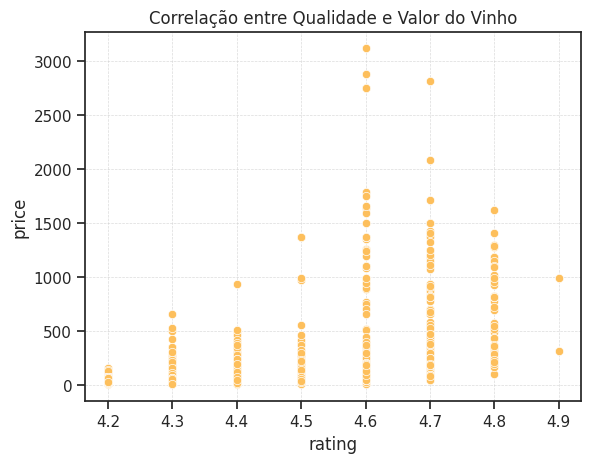

In [6]:
correlation = df['rating'].corr(df['price'])
print(f"Correlação entre qualidade e valor: {correlation}")

# Visualização da correlação
scatterplot = sns.scatterplot(data=df, x='rating', y='price')
plt.title('Correlação entre Qualidade e Valor do Vinho')

scatterplot.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
scatterplot.set_zorder(2)
scatterplot.grid(True, which='both', axis='x', linestyle='--', linewidth=0.5, alpha=0.7, zorder=1)

plt.show()

**Correlação de Pearson - Explicação**
- Esta medida é utilizada para avaliar o relacionamento linear entre duas variáveis contínuas. 
- É adequada quando os dados seguem uma distribuição normal e quando a relação entre as variáveis é linear.
- A correlação de Pearson varia de -1 a 1, onde -1 indica uma relação negativa perfeita, 0 indica ausência de correlação e 1 indica uma relação positiva perfeita.

**Análise**
- Um valor de 0.5448 indica uma correlação positiva moderada. Isso significa que, em geral, à medida que a pontuação dos vinhos aumenta, o preço também tende a aumentar.
- A correlação não implica causalidade. Embora haja uma relação entre preço e pontuação, isso não significa necessariamente que a pontuação alta causa o aumento do preço ou vice-versa. Outros fatores podem influenciar tanto o preço quanto a pontuação, como a reputação do produtor, a raridade do vinho, e preferências de mercado. Isso pode ser visto no rating 4.6, que apesar de não ser o maior score, tem preços que se destacam.
- Número de pessoas que fizeram reviews impacta na quantidade de vinhos apresentada.
- Vinhos mais baratos apresentam diferentes scores. No entanto, as notas mais baixas (4.3 e 4.2) apresentam apenas vinhos na menos faixa de preço.

### 3.2. A região do vinho afeta sua avaliação?

In [7]:
#descrição estatística dos tipos de vinho por avaliação
description = df.groupby(['type', 'region'])['rating'].describe()

In [8]:
description.head()

count      mean       std  min  25%  \
type               region                                                     
Albarino           Rias Baixas          251.0  4.213944  0.046527  4.2  4.2   
                   Vino de Espana         1.0  4.400000       NaN  4.4  4.4   
Cabernet Sauvignon Dehesa del Carrizal    1.0  4.500000       NaN  4.5  4.5   
                   Penedes                5.0  4.260000  0.054772  4.2  4.2   
                   Pla de Bages           1.0  4.400000       NaN  4.4  4.4   

                                        50%  75%  max  
type               region                              
Albarino           Rias Baixas          4.2  4.2  4.5  
                   Vino de Espana       4.4  4.4  4.4  
Cabernet Sauvignon Dehesa del Carrizal  4.5  4.5  4.5  
                   Penedes              4.3  4.3  4.3  
                   Pla de Bages         4.4  4.4  4.4

In [32]:
#Distribuição das avaliações por região
top_regions = df['region'].value_counts().index[:7]
df_top_regions = df[df['region'].isin(top_regions)]

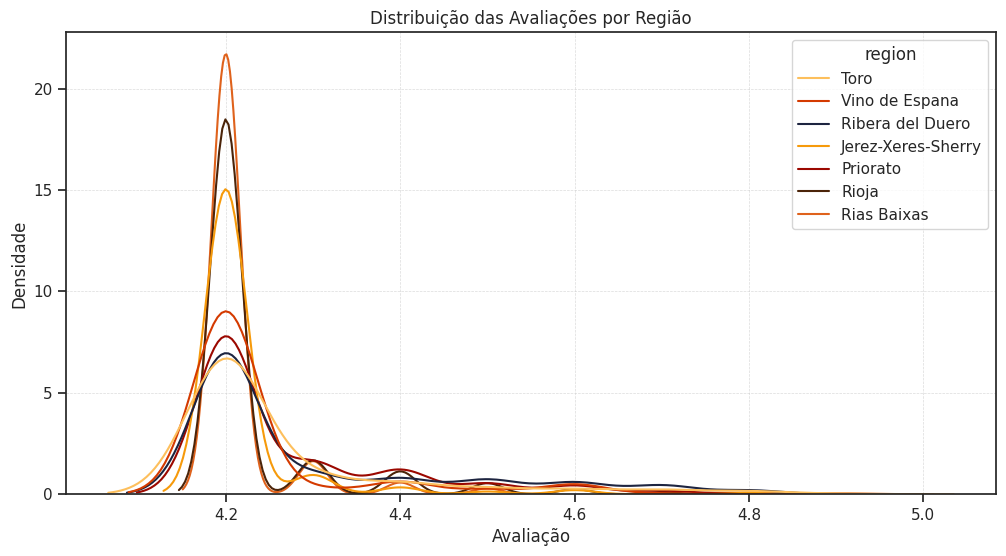

In [44]:
plt.figure(figsize=(12, 6))
kdeplot = sns.kdeplot(data=df_top_regions, x='rating', hue='region', common_norm=False, palette=colors)
plt.title('Distribuição das Avaliações por Região')
plt.xlabel('Avaliação')
plt.ylabel('Densidade')

kdeplot.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
kdeplot.set_zorder(2)
kdeplot.grid(True, which='both', axis='x', linestyle='--', linewidth=0.5, alpha=0.7, zorder=1)

plt.show()

In [11]:
#Seleciionando 7 tipos para comparação
top_types = df['type'].value_counts().index[:7]
df_top_types = df[df['type'].isin(top_types)]

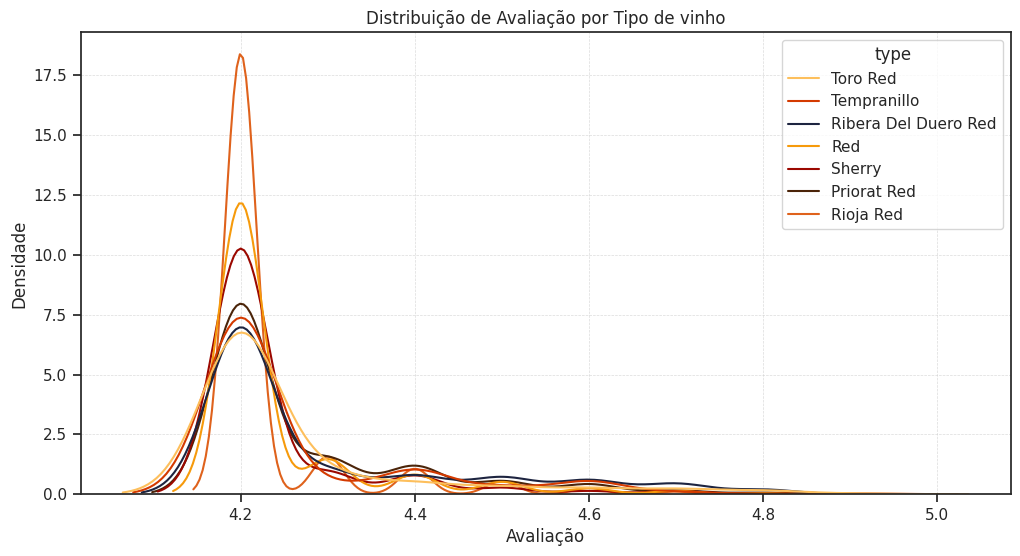

In [43]:
plt.figure(figsize=(12, 6))
kdeplot = sns.kdeplot(data=df_top_types, x='rating', hue='type', common_norm=False)
plt.title('Distribuição de Avaliação por Tipo de vinho')
plt.xlabel('Avaliação')
plt.ylabel('Densidade')

kdeplot.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
kdeplot.set_zorder(2)
kdeplot.grid(True, which='both', axis='x', linestyle='--', linewidth=0.5, alpha=0.7, zorder=1)

plt.show()

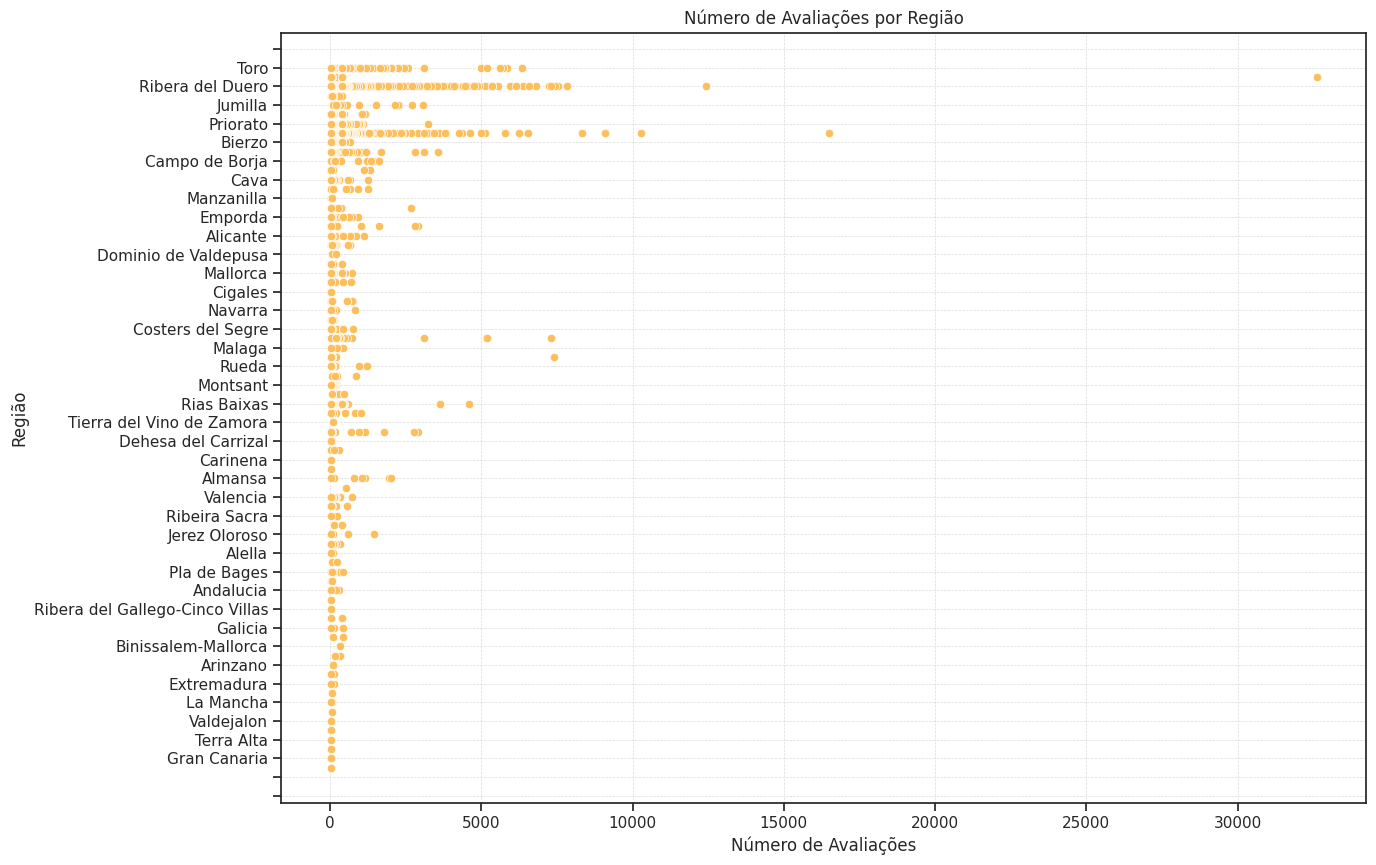

In [13]:
#Distribuição do número de avaliações por região
plt.figure(figsize=(14, 10))
scatterplot = sns.scatterplot(x='num_reviews', y='region', data=df)
plt.title('Número de Avaliações por Região')
plt.xlabel('Número de Avaliações')
plt.ylabel('Região')

# Ajustando o espaçamento entre os rótulos do eixo y
scatterplot.set_yticks(scatterplot.get_yticks())  # Para garantir que os ticks estejam configurados corretamente
plt.gca().yaxis.set_major_locator(plt.MaxNLocator(integer=True, prune='both', nbins=len(df['region'].unique())))

scatterplot.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
scatterplot.set_zorder(2)
scatterplot.grid(True, which='both', axis='x', linestyle='--', linewidth=0.5, alpha=0.7, zorder=1)

plt.show()

- Pela distribuição de avaliações por região podemos ver que as regiões mais representadas no dataset possuem uma concentração de avaliações 4.2, em especial as regiões Rias Baixas, Rioja e Jerez-Xeres-Sherry. Já as regiões com  notas acima de 4.6 são as regiões Toro, Jerez-Xeres-Sherry, Vino de Espana e Ribera del Duero.
- Na distribuição de avaliação por Tipo de vinho, observa-se que também há uma concentração de avaliações 4.2, em especial vinhos tipo Rioja Red, Red e Sherry Já os tipos que obtiveram notas maiores que 4.8 são os tipos Toro Red, Red, Ribera Del Buero Red e Tempranillo.
- As 10 regiões mais avaliadas são as regiões Ribera del Duero, Rioja, Sardon de Duero, Rueda, Toro, Cataluna, Rias Baixas, Castilla y Leon, Priorato e Jumila.

### 3.3. O tipo de vinho interfere no valor?

In [14]:
#descrição estatística dos tipos de vinho
df.groupby('type')['price'].describe()

,count,mean,std,min,25%,50%,75%,max
type,,,,,,,,
Albarino,252.0,18.114673,5.295559,11.900000,16.7800,16.780,16.7800,59.95
Cabernet Sauvignon,11.0,51.090000,16.426115,16.900000,45.1500,55.000,63.9150,67.45
Cava,33.0,60.547576,34.081698,7.890000,40.3300,53.700,75.5000,164.66
Chardonnay,13.0,78.114615,74.414651,15.750000,28.4000,50.900,112.7600,249.95
Grenache,35.0,57.506286,47.087446,13.950000,27.6450,36.900,80.9500,197.00
Mencia,235.0,21.244170,20.870947,17.900000,17.9000,17.900,17.9000,269.95
Monastrell,18.0,38.637778,19.707725,8.950000,28.6000,34.385,55.8675,77.98
Montsant Red,17.0,72.024118,47.386883,16.250000,36.9300,51.050,119.0000,157.95
Pedro Ximenez,35.0,148.874286,138.836991,17.500000,34.5650,114.500,216.0000,701.05


- De acordo com o min e max, é possível perceber que o mesmo tipo de vinho pode ser muito barato ou muito caro. (Ex: Ribera Del Duero Red tem min de 7.9 e max de 2884).

In [15]:
#Distribuição dos Preços por tipo de vinho
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

#Definição do IQR para separar os outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]
non_outliers = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

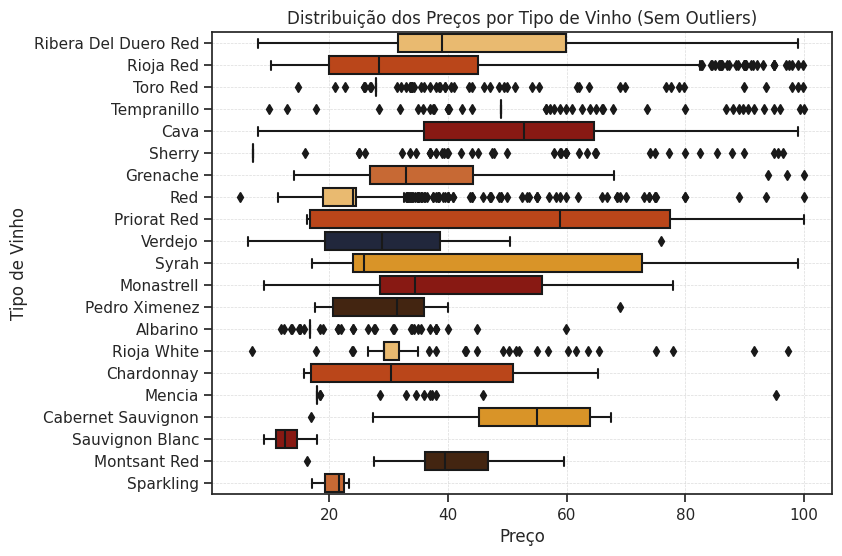

In [45]:
# Gráfico sem outliers
plt.figure(figsize=(8, 6))
boxplot = sns.boxplot(x='price', y='type', data=non_outliers,  palette=colors)
plt.title('Distribuição dos Preços por Tipo de Vinho (Sem Outliers)')
plt.xlabel('Preço')
plt.ylabel('Tipo de Vinho')

boxplot.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
boxplot.set_zorder(2)
boxplot.grid(True, which='both', axis='x', linestyle='--', linewidth=0.5, alpha=0.7, zorder=1)

plt.show()

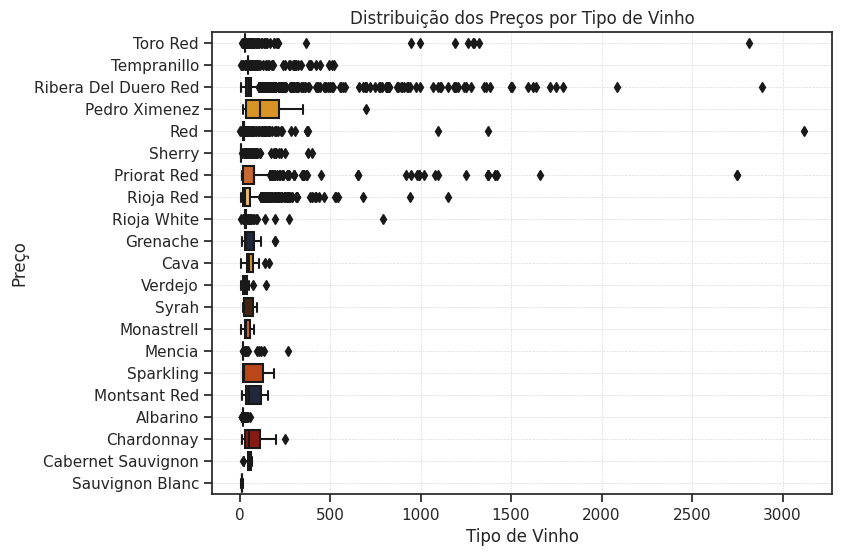

In [47]:
#Boxplot completo
plt.figure(figsize=(8, 6))
boxplot = sns.boxplot(x='price', y='type', data=df, palette=colors)
plt.title('Distribuição dos Preços por Tipo de Vinho')
plt.xlabel('Tipo de Vinho')
plt.ylabel('Preço')

boxplot.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
boxplot.set_zorder(2)
boxplot.grid(True, which='both', axis='x', linestyle='--', linewidth=0.5, alpha=0.7, zorder=1)

plt.show()

- Quando analisamos somente os dados sem outliers, vemos que os preços estão bem distribuidos e que existem preços mais acessíveis do mesmo tipo de vinho.
- Existem mais outliers em determinados tipos como Toro Red, Ribera del Duero Red e Priorat Red, porém os dois últimos tem uma distribuição considerável em preços abaixo de 100.

### 3.4. Qual a relação entre nota, preço e ano?

In [18]:
# Ordena os dados pelo ano
df_ordenado = df.sort_values(by='year')

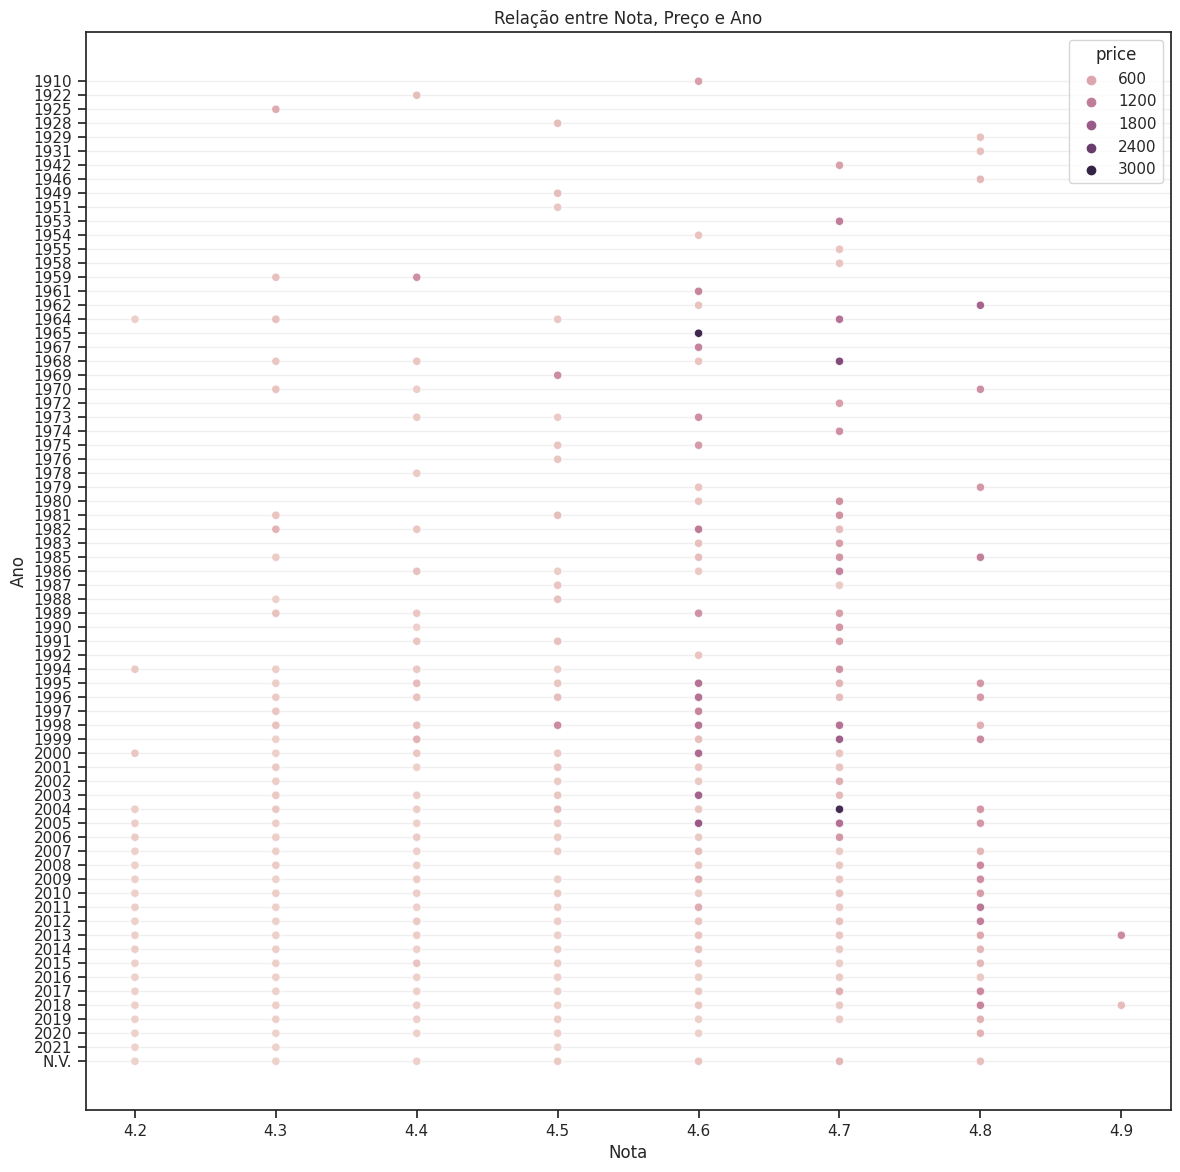

In [54]:
plt.figure(figsize=(14, 14))
sns.scatterplot(data=df_ordenado, x='rating', y='year', hue='price', hue_norm=(df_ordenado['price'].min(), df_ordenado['price'].max()))
plt.title('Relação entre Nota, Preço e Ano')
plt.xlabel('Nota')
plt.ylabel('Ano')
plt.grid(axis='y', linestyle='-', alpha=0.3)
plt.show()

- Os vinhos mais caros (3000 euros), no geral, não obteve notas melhores que os vinhos mais baratos, estando com 4.6 e 4.7 de nota. No qual, um está entre os mais antigos e o outro é recente [2004].

- Não há tanta relação com os vinhos mais baratos, visto que eles estão em todos os scores disponíveis. Independente do ano e de seu preço, os vinhos que valem até 600 euros possuem avaliações boas e ruins.

- Os vinhos com preço médio, entre 1200 e 1800, possuem boas avaliações. A maioria destes vinhos estão classificados entre 4.6 e 4.9 (maior avaliação).

- Em geral, os vinhos mais velhos estão entre as melhores avaliações, possuíndo poucos com avaliação baixa. Entretanto, há alguns mais recentes que também possuem boas avaliações. Estes podem ser considerados outliers e devem estar sendo determinado por outras variáveis, como o corpo e acidez do vinho.

- Apenas dois vinhos foram classificados com 4.9, ambos são de anos recentes [2013-2018] e estão entre os preços mais baixos [600-1200 euros].

Portanto, conclui-se que o preço não está diretamente relacionado ao score do vinho. Por outro lado, o ano possui certa influência nesta classificação.

### 3.5. Existe uma relação entre o preço e a quantidade de reviews?

In [20]:
bins = [0, 10, 20, 50, 100, df['price'].max()]
labels = ['Muito Barato', 'Barato', 'Médio', 'Caro', 'Muito Caro']
df['price_range'] = pd.cut(df['price'], bins=bins, labels=labels, include_lowest=True)

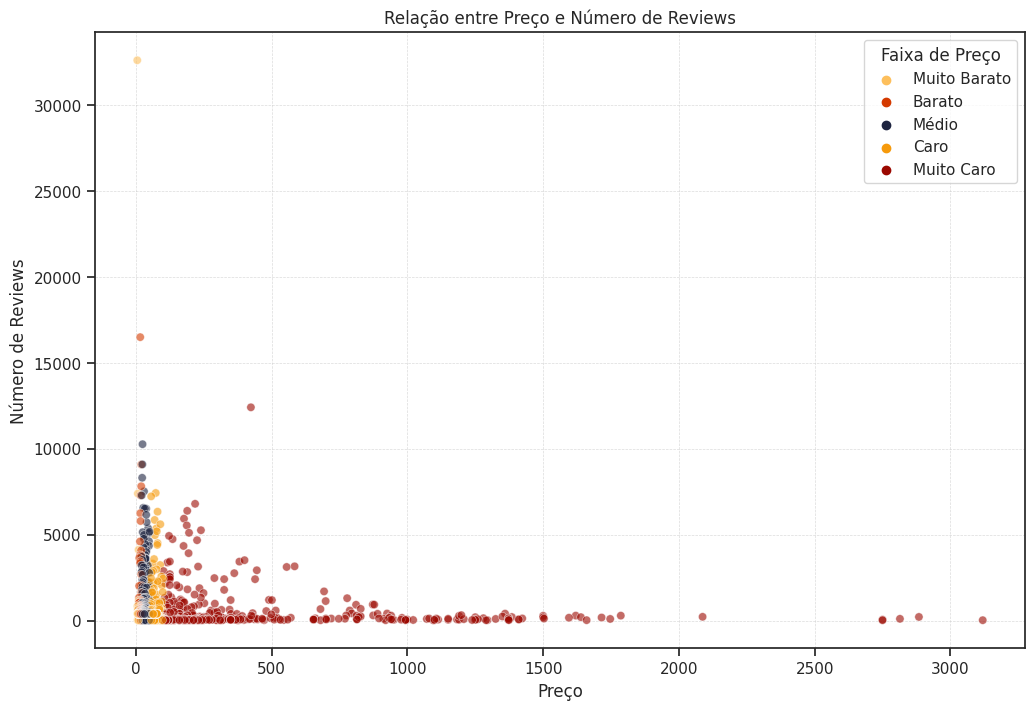

In [55]:
plt.figure(figsize=(12, 8))
scatterplot = sns.scatterplot(x='price', y='num_reviews', hue='price_range', data=df, alpha=0.6)
plt.xlabel('Preço')
plt.ylabel('Número de Reviews')
plt.title('Relação entre Preço e Número de Reviews')
plt.legend(title='Faixa de Preço')

scatterplot.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
scatterplot.set_zorder(2)
scatterplot.grid(True, which='both', axis='x', linestyle='--', linewidth=0.5, alpha=0.7, zorder=1)

plt.show()

**Análise**
- Percebe-se que quanto mais caro o vinho, menos avaliações ele tem. Dito isso, vinhos mais baratos, por serem mais acessíveis, tem um grande número de avaliações.
- O tipo "Red" é uma categoria ampla que inclui todos os vinhos tintos. Essa categoria se destaca por ter o maior número de avaliações e, além disso, muitos desses vinhos são encontrados na faixa de preço "Muito Barato".

Médio           40.373333
Barato          28.506667
Caro            20.786667
Muito Caro       7.173333
Muito Barato     3.160000
Name: price_range, dtype: float64


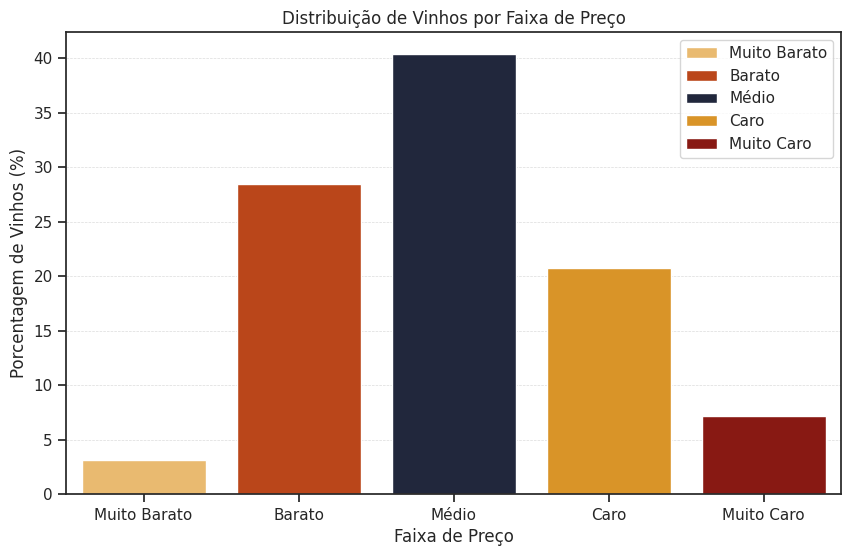

In [22]:
# Calculando o número de vinhos em cada faixa de preço
price_range_counts = df['price_range'].value_counts()

# Calculando as porcentagens
price_range_percentages = (price_range_counts / len(df)) * 100

# Exibindo os resultados
print(price_range_percentages)

# Opcional: Plotando um gráfico de barras para visualização
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x=price_range_percentages.index, y=price_range_percentages.values, hue=price_range_percentages.index, dodge=False)
plt.xlabel('Faixa de Preço')
plt.ylabel('Porcentagem de Vinhos (%)')
plt.title('Distribuição de Vinhos por Faixa de Preço') 

barplot.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
barplot.xaxis.grid(False)
barplot.set_zorder(2)
barplot.grid(True, which='both', axis='y', linestyle='--', linewidth=0.5, alpha=0.7, zorder=1)

plt.show()

**Análise**
- A faixa de valores de valores em maior quantidade é a de preço médio.

### 3.6. Como a diversidade de tipos de vinho varia entre as 10 principais regiões produtoras de vinho?

In [23]:
# Contar o número total de regiões distintas
total_regions = df['region'].nunique()

print(f"Total de regiões no dataset: {total_regions}")

Total de regiões no dataset: 76


In [24]:
# Contar o número total de tipos de vinho
total_types = df['type'].nunique()

print(f"Total de tipos de vinho no dataset: {total_types}")

Total de tipos de vinho no dataset: 21


In [25]:
# Contar o número de vinhos por região
region_counts = df['region'].value_counts()

# Selecionar as 10 principais regiões
top_10_regions = region_counts.head(10).index

# Filtrar o dataset para as 10 principais regiões
top_10_df = df[df['region'].isin(top_10_regions)]

# Contar o número de tipos de vinho por região
diversity = top_10_df.groupby('region')['type'].nunique().reset_index()
diversity.columns = ['region', 'num_types']

# Exibir a tabela de diversidade para análise adicional
print(diversity)

               region  num_types
0            Alicante          1
1              Bierzo          2
2  Jerez-Xeres-Sherry          2
3            Mallorca          1
4            Priorato          2
5         Rias Baixas          1
6    Ribera del Duero          3
7               Rioja          5
8                Toro          4
9      Vino de Espana          6


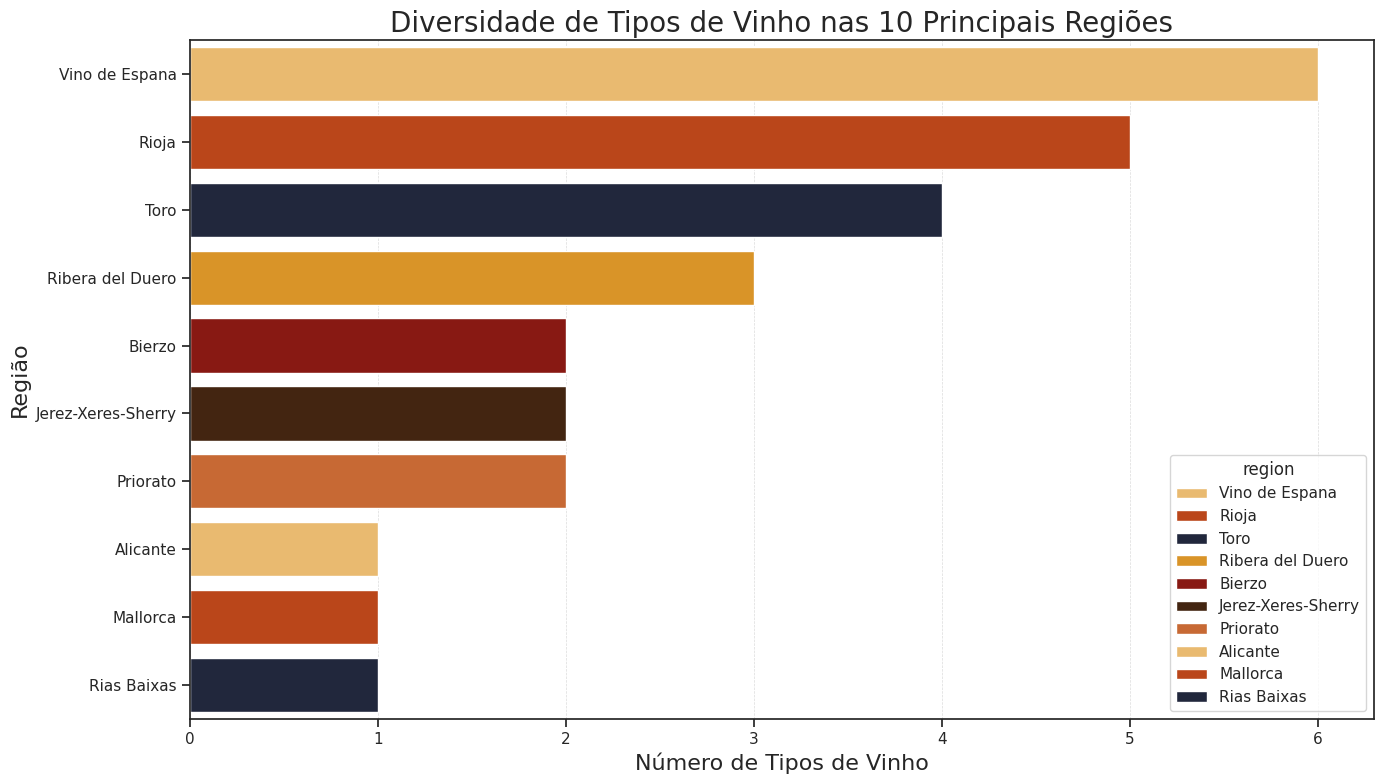

In [56]:
diversity_sorted = diversity.sort_values(by='num_types', ascending=False)

plt.figure(figsize=(14, 8))
barplot = sns.barplot(data=diversity_sorted, x='num_types', y='region', hue='region', dodge=False, palette=colors)

plt.title('Diversidade de Tipos de Vinho nas 10 Principais Regiões', fontsize=20)
plt.xlabel('Número de Tipos de Vinho', fontsize=16)
plt.ylabel('Região', fontsize=16)
plt.tight_layout()

barplot.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
barplot.yaxis.grid(False)
barplot.set_zorder(2)
barplot.grid(True, which='both', axis='x', linestyle='--', linewidth=0.5, alpha=0.7, zorder=1)

# Mostrar o gráfico
plt.show()

**Análise**

- O gráfico e os resultados da análise demonstram que a diversidade de vinhos nas 10 principais regiões espanholas é variável, com algumas regiões apresentando uma gama muito maior de tipos de vinho do que outras. Essa diversidade é resultado de uma combinação de fatores históricos, geográficos e culturais.

### 3.7. Como o corpo do vinho influencia o preço dos vinhos com avaliação acima de 4.0 em diferentes regiões da Espanha?

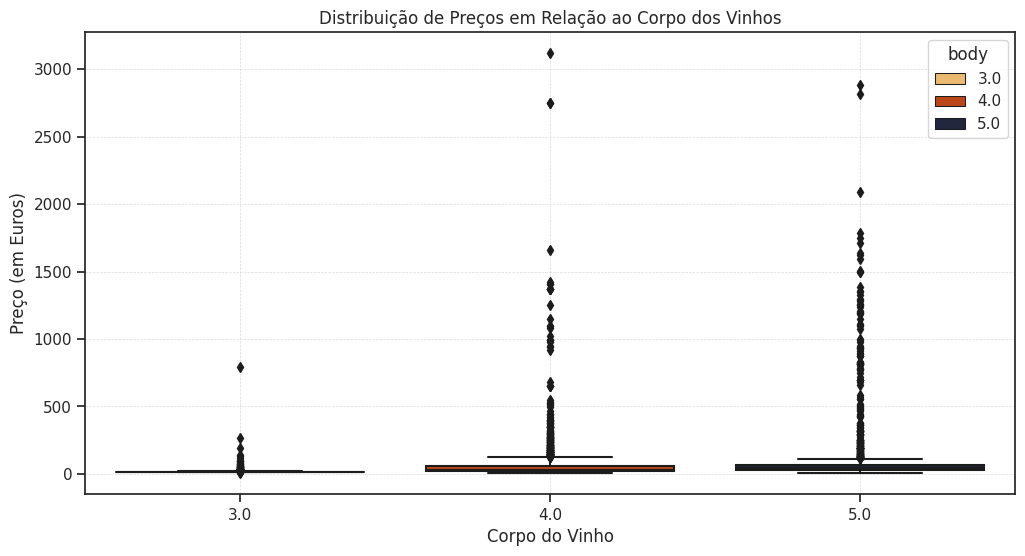

       count        mean         std   min    25%    50%    75%      max
body                                                                    
3.0    524.0   24.324060   38.765551  6.99  16.78  17.90  17.90   795.00
4.0   3439.0   57.140458  137.120089  4.99  18.90  28.53  61.94  3119.08
5.0   1551.0  109.146754  247.666409  7.90  31.63  40.45  64.50  2884.04
Correlação entre corpo do vinho e preço: 0.15


In [27]:
# Filtrando os vinhos com avaliação acima de 4.0
df_filtered = df[df['rating'] > 4.0]

# Selecionando as 10 principais regiões da Espanha
top_regions = df_filtered['region'].value_counts().head(10).index
df_top_regions = df_filtered[df_filtered['region'].isin(top_regions)]

# Analisando a distribuição dos preços em relação ao corpo dos vinhos
plt.figure(figsize=(12, 6))
boxplot = sns.boxplot(data=df_top_regions, x='body', y='price', hue='body', dodge=False)
plt.title('Distribuição de Preços em Relação ao Corpo dos Vinhos')
plt.xlabel('Corpo do Vinho')
plt.ylabel('Preço (em Euros)')

boxplot.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
boxplot.set_zorder(2)
boxplot.grid(True, which='both', axis='x', linestyle='--', linewidth=0.5, alpha=0.7, zorder=1)

plt.show()

# Estatísticas descritivas
print(df_top_regions.groupby('body')['price'].describe())

# Testando a hipótese
# Vamos usar a correlação para ver a relação entre corpo e preço
correlation = df_top_regions[['body', 'price']].corr().iloc[0, 1]
print(f"Correlação entre corpo do vinho e preço: {correlation:.2f}")

**Análise**
- Os vinhos com corpo mais intenso (4.0 e 5.0) têm preços médios mais altos comparados aos vinhos com corpo menos intenso (2.0 e 3.0).

- O desvio padrão é maior para vinhos com corpo mais intenso, indicando uma maior variação de preços, com alguns vinhos sendo significativamente mais caros.

- A correlação de 0.16 sugere que há uma tendência de que vinhos com corpo mais intenso sejam mais caros, mas essa relação não é forte.

**Conclusão**

- Os resultados suportam parcialmente a hipótese de que vinhos com corpo mais intenso e avaliação acima de 4.0 são geralmente mais caros. Embora haja uma tendência de que vinhos com corpo mais intenso tenham preços médios mais altos, a correlação fraca indica que outras variáveis também podem influenciar significativamente o preço do vinho.


### 3.8. A acidez do vinho interfere em seu preço?

In [28]:
# Estatísticas descritivas
print(df[['price', 'acidity']].describe())

             price      acidity
count  7500.000000  6331.000000
mean     60.095822     2.946612
std     150.356676     0.248202
min       4.990000     1.000000
25%      18.900000     3.000000
50%      28.530000     3.000000
75%      51.350000     3.000000
max    3119.080000     3.000000


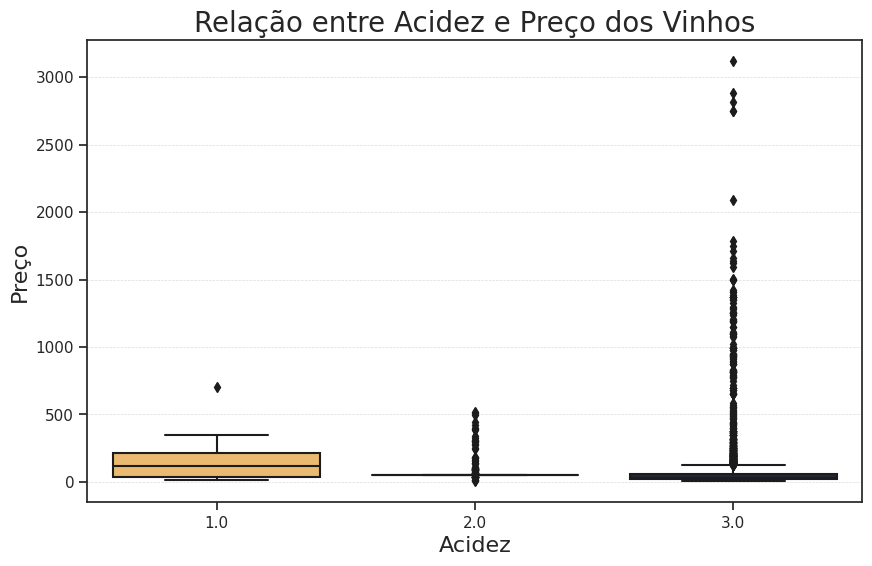

Correlação entre acidez e preço: -0.03
Correlação entre acidez e preço: -0.03


In [58]:
plt.figure(figsize=(10, 6))

# Criação do boxplot
boxplot = sns.boxplot(x='acidity', y='price', data=df)

# Adicionando título e rótulos
plt.title('Relação entre Acidez e Preço dos Vinhos', fontsize=20)
plt.xlabel('Acidez', fontsize=16)
plt.ylabel('Preço', fontsize=16)

plt.grid(axis='y', linestyle='--', linewidth=0.5, alpha=0.7)

plt.show()

correlation = df['acidity'].corr(df['price'])
print(f'Correlação entre acidez e preço: {correlation:.2f}')
print(f'Correlação entre acidez e preço: {correlation:.2f}')

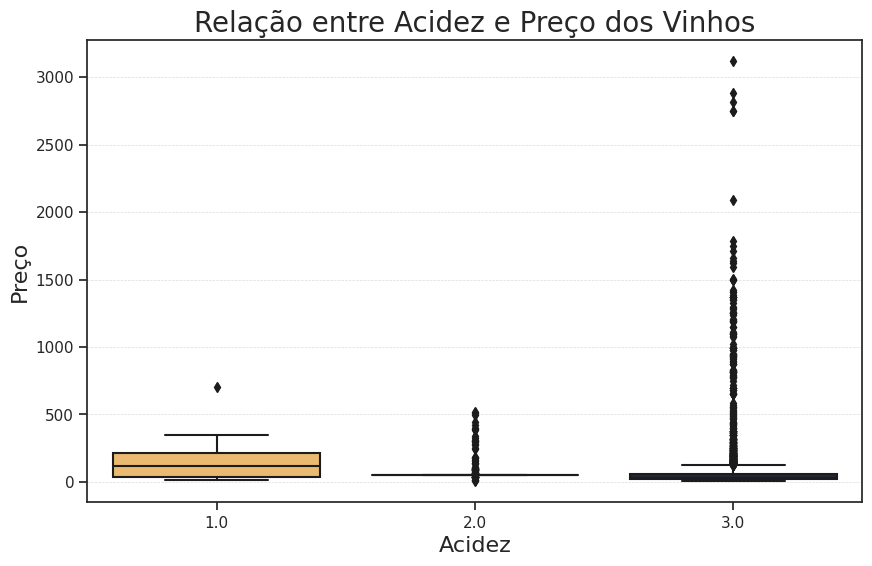

Correlação entre acidez e preço: -0.03


In [30]:
#Verificar se o gráfico de cima é melhor que este.

plt.figure(figsize=(10, 6))
boxplot = sns.boxplot(x='acidity', y='price', data=df)

plt.title('Relação entre Acidez e Preço dos Vinhos', fontsize=20)
plt.xlabel('Acidez', fontsize=16)
plt.ylabel('Preço', fontsize=16)
plt.grid(axis='y', linestyle='--', linewidth=0.5, alpha=0.7)
plt.show()

# Calcular a correlação entre acidez e preço
correlation = df['acidity'].corr(df['price'])
print(f'Correlação entre acidez e preço: {correlation:.2f}')


**Análise**

- A correlação entre acidez e preço é -0.03, o que indica uma relação muito fraca e praticamente nula entre essas duas variáveis. Isso sugere que, com base nos dados disponíveis, não há uma relação significativa entre a acidez do vinho e o seu preço.

**Conclusão**
- A hipótese de que vinhos com acidez moderada possuem preços mais altos pode não se confirmar com base nos dados analisados. Pode ser necessário explorar outras variáveis ou fatores que possam influenciar o preço dos vinhos.

## 4. Insights

- Em geral, à medida que a pontuação dos vinhos aumenta, o preço também tende a aumentar. Isso indica que vinhos com melhores avaliações tendem a ser mais caros. Porém, isso não significa necessariamente que uma alta pontuação cause um aumento no preço ou vice-versa.

- Vinhos mais baratos apresentam uma variedade de scores. No entanto, é notável que as notas mais baixas aparecem exclusivamente na faixa de preço mais baixa. Isso sugere que, embora existam vinhos baratos com boas pontuações, vinhos com as pontuações mais baixas estão predominantemente no segmento de menor preço.

- A acessibilidade econômica é um fator crucial na popularidade e no número de avaliações dos vinhos. Vinhos mais baratos são mais frequentemente avaliados, possivelmente porque são comprados por um público mais amplo.

- O tipo "Red" é uma categoria ampla que inclui todos os vinhos tintos. Esta categoria se destaca por ter o maior número de avaliações entre todos os tipos de vinho.

- A associação significativa entre região e tipo de vinho sugere que a localização tem um impacto importante sobre o tipo de vinho produzido. Isso pode ser devido a condições climáticas específicas, práticas de vinificação regionais ou preferências locais.

- Embora vinhos com corpo mais intenso e avaliações acima de 4.0 tendam a ter preços mais altos, a relação não é suficientemente forte para afirmar com certeza que corpo e avaliação são os principais determinantes do preço. Isso sugere que o preço dos vinhos é influenciado por múltiplos fatores e que mais variáveis precisam ser consideradas para entender completamente o preço.

- A hipótese de que vinhos com acidez moderada são mais caros pode não se confirmar com base nos dados atuais. Isso indica que a acidez sozinha pode não ser um fator determinante significativo para o preço. Pode ser útil explorar outras características dos vinhos, como a região de produção, a classificação ou o tipo de vinho, para entender melhor o que influencia o preço.